## Datasets for Manifold Learning

Datasets for Reimannian learning have additional number of features vectors for each datapoint. Most of the data in Riemannian spaces (which are non Euclidean) include hyperbolic manifolds such as Poincare interpolation of feature vectors or graph based data. In this case, we will be looking into graph based data. Most of the real world Riemannian geometry involve graphical interpolation. Since graph interpolation is a lower dimensional representation of a generic manifold, any graph optimization algorithm can be analysed as a form of lower dimensional manifold optimization. The 2 most significant datasets include:

- [Cora](https://graphsandnetworks.com/the-cora-dataset/): The Cora dataset consists of 2708 scientific publications classified into one of seven classes. The citation network consists of 5429 links. Each publication in the dataset is described by a 0/1-valued word vector indicating the absence/presence of the corresponding word from the dictionary. The dictionary consists of 1433 unique words.

<img src="https://graphsandnetworks.com/wp-content/uploads/2019/09/CoraBalloons.png">


- [Pubmed](https://paperswithcode.com/dataset/pubmed): The Pubmed dataset consists of 19717 scientific publications from PubMed database pertaining to diabetes classified into one of three classes. The citation network consists of 44338 links. Each publication in the dataset is described by a TF/IDF weighted word vector from a dictionary which consists of 500 unique words.
<img src="https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fs41597-020-0543-2/MediaObjects/41597_2020_543_Fig5_HTML.png">


These datasets are synonymous with the MNIST dataset for Computer vision. In this notebook, we will be looking at the data present in these graphical Riemann manifolds using [pytorch geometric](https://pytorch-geometric.readthedocs.io/en), [networkx](https://networkx.org/) and [pyvis](https://pyvis.readthedocs.io/) libraries. 




In [1]:
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-1.9.0+cu111.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-1.9.0+cu111.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

     |████████████████████████████████| 10.4 MB 2.1 MB/s 
     |████████████████████████████████| 3.7 MB 2.2 MB/s 
     |████████████████████████████████| 407 kB 5.0 MB/s 
     |████████████████████████████████| 45 kB 2.9 MB/s 


### Loading the Cora dataset

The Cora dataset can be loaded from the Planetoid module inside the torch geometric datasets. This is the [standard benchmark](https://pytorch-geometric.readthedocs.io/en/latest/notes/introduction.html#common-benchmark-datasets) dataset for semi-supervised graph node classification.

Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7


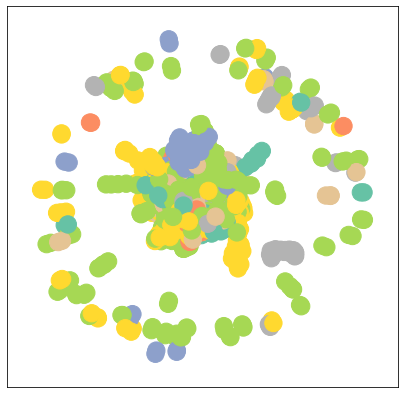

In [9]:
from torch_geometric.datasets import Planetoid
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt
import torch
import networkx as nx

def visualize(h, color, epoch=None, loss=None):
    """This is used for visualizing a partivular subgraph from the torch geoemtric dataset
        using networkx module.
    """

    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None:
            plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

"""Loading the Cora dataset from Torch geometric . For more details please refer to : https://pytorch-geometric.readthedocs.io/en/latest/notes/introduction.html#common-benchmark-datasets"""
dataset = Planetoid(root='/tmp/Cora', name='Cora')
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data=dataset[0]
G = to_networkx(data, to_undirected=True)
visualize(G, color=data.y)

In [ ]:
!pip install pyvis

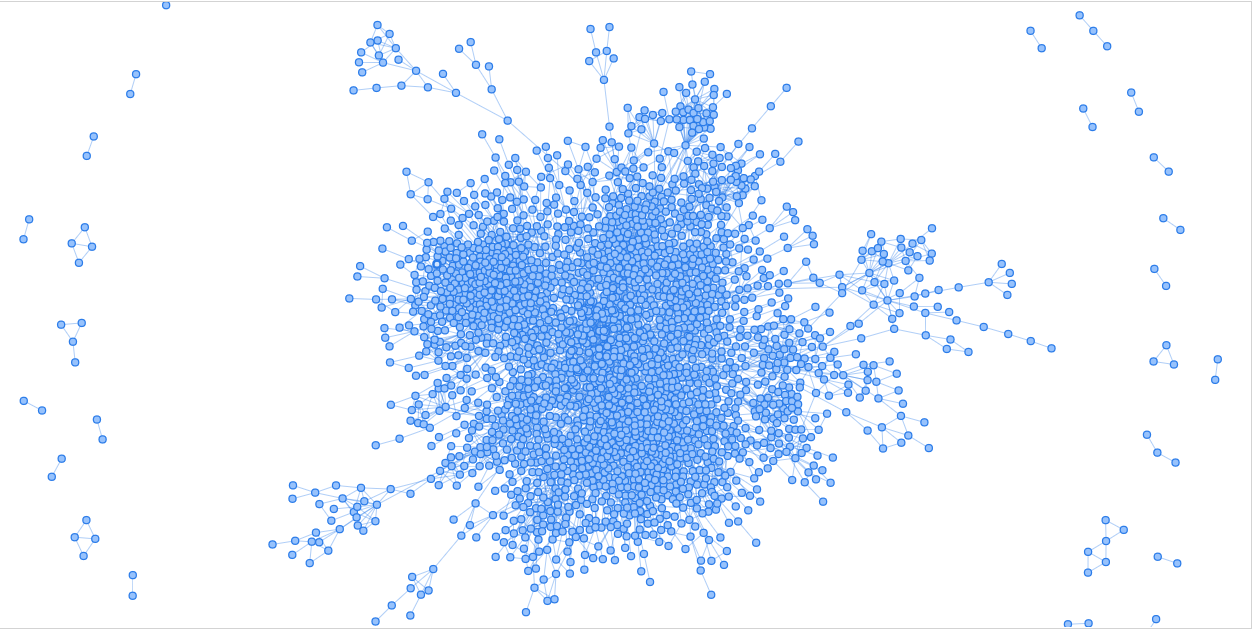

In [13]:

## using the pyvis module to visualize the dataset

"""On running the draw_graph_pyvis command, a html page will be created and stored in Colab session. Users can 
download the html page or view it in the web browser. By default the physics of interaction are kept active along
with the Jupyter notebook display."""

from pyvis import network as net
def draw_graph_pyvis(networkx_graph,notebook=True,output_filename='cora_graph.html',show_buttons=False,only_physics_buttons=True):
        """
        This function accepts a networkx graph object,
        converts it to a pyvis network object preserving its node and edge attributes,
        and both returns and saves a dynamic network visualization.

        Valid node attributes include:
            "size", "value", "title", "x", "y", "label", "color".

            (For more info: https://pyvis.readthedocs.io/en/latest/documentation.html#pyvis.network.Network.add_node)

        Valid edge attributes include:
            "arrowStrikethrough", "hidden", "physics", "title", "value", "width"

            (For more info: https://pyvis.readthedocs.io/en/latest/documentation.html#pyvis.network.Network.add_edge)


        Args:
            networkx_graph: The graph to convert and display
            notebook: Display in Jupyter? True/False
            output_filename: Where to save the converted network
            show_buttons: Show buttons in saved version of network?
            only_physics_buttons: Show only buttons controlling physics of network?
        """

      
        # make a pyvis network
        pyvis_graph = net.Network(notebook=notebook)
        pyvis_graph.width = '1000px'
        # for each node and its attributes in the networkx graph
        for node,node_attrs in networkx_graph.nodes(data=True):
            pyvis_graph.add_node(node,**node_attrs)
    #         print(node,node_attrs)

        # for each edge and its attributes in the networkx graph
        for source,target,edge_attrs in networkx_graph.edges(data=True):
            # if value/width not specified directly, and weight is specified, set 'value' to 'weight'
            if not 'value' in edge_attrs and not 'width' in edge_attrs and 'weight' in edge_attrs:
                # place at key 'value' the weight of the edge
                edge_attrs['value']=edge_attrs['weight']
            # add the edge
            pyvis_graph.add_edge(source,target,**edge_attrs)

        # turn buttons on
        if show_buttons:
            if only_physics_buttons:
                pyvis_graph.show_buttons(filter_=['physics'])
            else:
                pyvis_graph.show_buttons()

        # return and also save
        return pyvis_graph.show(output_filename)

draw_graph_pyvis(G,output_filename='cora_graph.html', notebook=True)

### Loading the Enzymes Dataset

the ENZYMES dataset consists of 600 graphs within 6 classes is another classic sample of graph dataset. If we extract the first graph from the dataset ,we can see that the first graph in the dataset contains 37 nodes, each one having 3 features. There are 168/2 = 84 undirected edges and the graph is assigned to exactly one class. In addition, the data object is holding exactly one graph-level target.

Dataset: ENZYMES(600):
Number of graphs: 600
Number of features: 3
Number of classes: 6


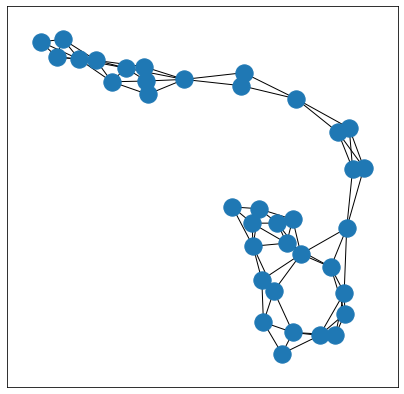

In [23]:
from torch_geometric.datasets import TUDataset
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt
import torch
import networkx as nx

def visualize(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None:
            plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False)
    plt.show()

dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES')
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data=dataset[0]
G = to_networkx(data, to_undirected=True)
visualize(G, color=data.y)

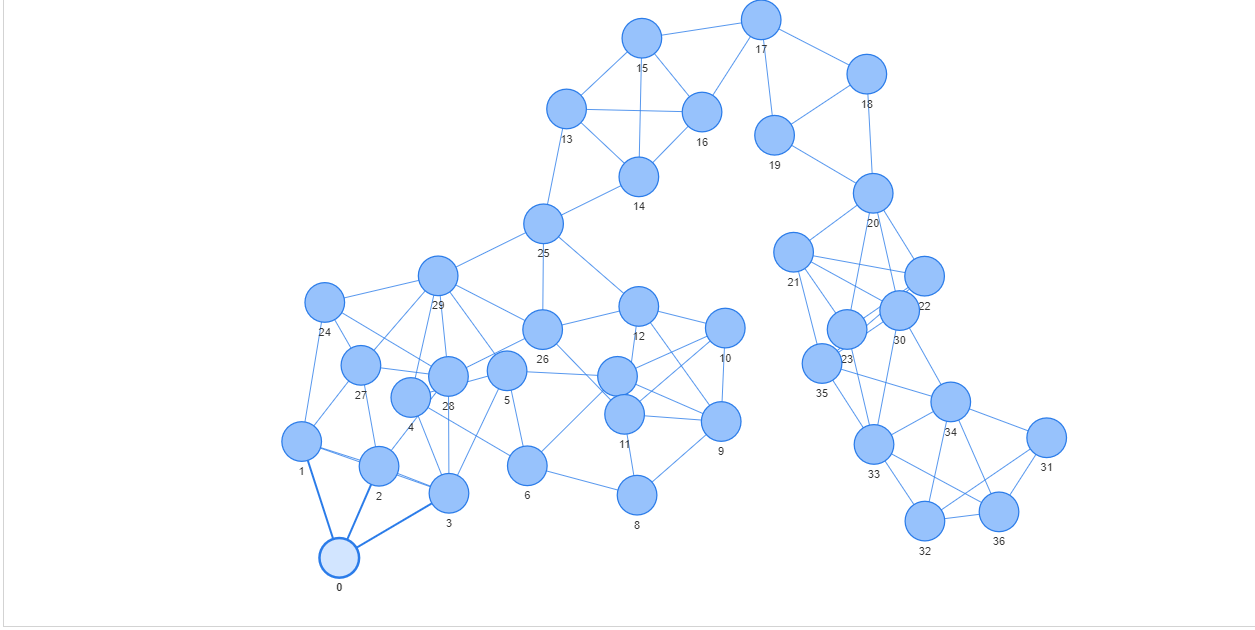

In [24]:
#Visualization of Enzymes dataset from torch geometric.
draw_graph_pyvis(G,output_filename='enzyme_graph.html', notebook=True)